<a href="https://colab.research.google.com/github/singhsukhendra/ComputerAidedDiagnosis/blob/master/QVNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install init

  Created wheel for init: filename=init-0.1.0-cp36-none-any.whl size=36341 sha256=b70a40f0f43739536312a774e233926e74d402f1c07ae175fdc50b6e7347cade
  Stored in directory: /root/.cache/pip/wheels/5f/fa/81/b3fb590dfaec2e0423732bafd7b6992977f25d5c2d96923285
  Created wheel for terminal: filename=terminal-0.4.0-cp36-none-any.whl size=13223 sha256=ad26b1d5420f08fb22954202119a40b70c95dcc96cb5db5af815b636501f5a3b
  Stored in directory: /root/.cache/pip/wheels/7e/ca/01/f96ebc47ba4074755bd8251b1bacfe688da11496a4b8394224
Successfully built init terminal


In [2]:
!pip install conv

In [3]:
! git clone https://github.com/XYZ387/QuaternionCNN_Keras.git

Cloning into 'QuaternionCNN_Keras'...
remote: Enumerating objects: 43, done.
remote: Total 43 (delta 0), reused 0 (delta 0), pack-reused 43
Unpacking objects: 100% (43/43), done.


170500096/170498071 [==============================] - 12s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Using real-time data augmentation.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










Epoch 1/30
1563/1563 [==============================] - 88s 56ms/step - loss: 1.8140 - acc: 0.3339 - val_loss: 1.4997 - val_acc: 0.4632

Epoch 2/30
1563/1563 [==============================] - 83s 53ms/step - loss: 1.5098 - acc: 0.4510 - val_loss: 1.2913 - val_acc: 0.5422
Epoch 3/30
1563/1563 [==============================] - 83s 53ms/step - loss: 1.3782 - acc: 0.5040 - val_loss: 1.2087 - val_acc: 0.5717
Epoch 4/30
1563/1563 [==============================] - 83s 53ms/step - loss: 1.2882 - acc: 0.5412 - val_loss: 1.1200 - val_acc: 0.6050
Epoch 5/30
1563/1563 [==============================]

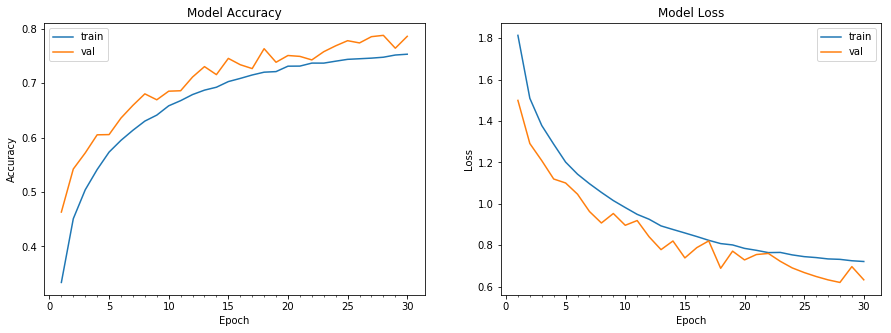

Model took 2509.90 seconds to train
Accuracy on test data is: 78.58


In [5]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.

It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import time

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard
import os
import pickle
import numpy as np
from QuaternionCNN_Keras.quaternion_layers import QConv1D, QConv2D, QConv3D, QDense

batch_size = 32
num_classes = 10
epochs = 30
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model_Q.h5'

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

num_train, img_channels, img_rows, img_cols =  x_train.shape
num_test, _, _, _ =  x_test.shape
num_classes = len(np.unique(y_train))
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

'''
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (1, 2, 0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()
'''





def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()



def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)










# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(QConv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(QConv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(QConv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(QConv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(QDense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    start = time.time()
    model_info=model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        callbacks=[TensorBoard(log_dir='./tmp/cifar10small')])
    
						
    end = time.time()
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
model.summary()

plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(x_test, y_test, model))
